# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [4]:
cast = pd.read_csv("data/cast.csv")
r_dates = pd.read_csv("data/release_dates.csv")
titles = pd.read_csv("data/titles.csv")



#### Cast

In [6]:
print(cast.head(5))
print(cast.info())

                  title  year      name   type                character     n
0        Closet Monster  2015  Buffy #1  actor                  Buffy 4  31.0
1       Suuri illusioni  1985    Homo $  actor                   Guests  22.0
2   Battle of the Sexes  2017   $hutter  actor          Bobby Riggs Fan  10.0
3  Secret in Their Eyes  2015   $hutter  actor          2002 Dodger Fan   NaN
4            Steve Jobs  2015   $hutter  actor  1988 Opera House Patron   NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442902 entries, 0 to 3442901
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 157.6+ MB
None


In [7]:
cast.count()

title        3442896
year         3442902
name         3442902
type         3442902
character    3442894
n            2115119
dtype: int64

year
2017    136658
2018     43518
2019      1406
2020       188
2021        34
2022        16
2023         2
2024         8
2025         9
2115         3
Name: count, dtype: int64

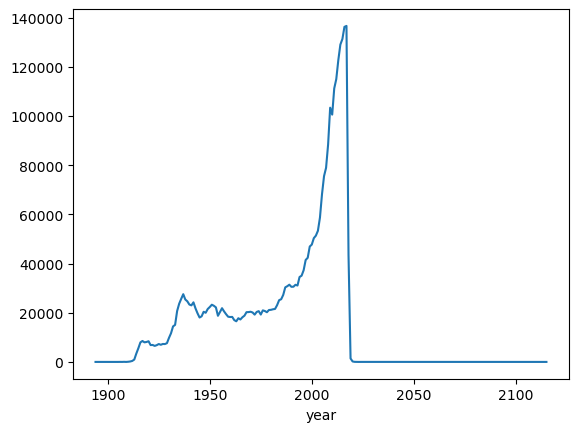

In [8]:
cast['year'].value_counts().sort_index().plot()
cast['year'].value_counts().sort_index().tail(10)

In [9]:
cast_copy = cast[cast['year'] < 2018].copy()

##### The cast csv file has data that includes cast member names, the name of the film they starred in, the release date of the film, whether they are an actor or actress, and their billing number. 

##### Looking at the release years and the number of films released per year, the count for the number of films launched increased significantly between 1920 to 1940, then steadies out, and then rockets up after the 1990s. There is a precipitous decline after 2017, which tells me the data is either incomplete after 2017. Therefore, I removed all data after 2017.

#### Dates

In [11]:
print(r_dates.info())
print('\n\n',r_dates.head(5))
print('\n\n',r_dates.count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443486 entries, 0 to 443485
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    443485 non-null  object
 1   year     443486 non-null  int64 
 2   country  443486 non-null  object
 3   date     443486 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB
None


                     title  year      country        date
0   #73, Shaanthi Nivaasa  2007        India  2007-06-15
1                   #BKKY  2016     Cambodia  2017-10-12
2                 #Beings  2015      Romania  2015-01-29
3               #Captured  2017          USA  2017-09-05
4  #Ewankosau saranghaeyo  2015  Philippines  2015-01-21


 title      443485
year       443486
country    443486
date       443486
dtype: int64


In [12]:
print(r_dates['country'].value_counts().head(10))
print('\n','Number of Countries In Dataset that released films: ', len(r_dates['country'].unique()))

country
USA         42241
France      23739
Finland     18544
Sweden      18337
Portugal    18123
Denmark     17683
Japan       17007
UK          15640
Italy       13257
India       12886
Name: count, dtype: int64

 Number of Countries In Dataset that released films:  200


##### The dataset for release dates contains 443486 entries and includes film titles, release year, country, and release date. 

##### When ranking countries by number of movies released, the US far exceeds movies released in other countries. More movies were released in the US than the next two top releasing countries combined.

In [13]:
print(titles.info())
print('\n\n',titles.head(5))
print('\n\n',titles.count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226013 entries, 0 to 226012
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   226012 non-null  object
 1   year    226013 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB
None


                       title  year
0           Ankara ekspresi  1952
1  Ans Vaterland, ans teure  1915
2               Miss Mohini  2002
3             La vera madre  1999
4              O Amerikanos  1993


 title    226012
year     226013
dtype: int64


##### The dataset for Titles includes 226012 entries and only includes data for film title and its release year.

In [15]:
all_data = pd.concat([titles, r_dates], ignore_index=True)

##### Compare the number of titles included among datasets

In [17]:
print('cast: ', cast['title'].nunique(),'\nr_dates',r_dates['title'].nunique(),'\ntitles: ', titles['title'].nunique())

cast:  168254 
r_dates 125163 
titles:  207630


##### Even though the Titles dataset has the fewest number of entries, it includes the largest number of listed titles. This means the other datasets are including repeat titles. This is because "Cast" will include multiple entries for a film title, covering different cast memers. "Release Date" includes multiple entries for a title, differentiating the country of release and date of release in that country.

### 2. How many movies have the title North by Northwest

In [160]:
nnw_count = titles[titles['title'] == "North by Northwest"]['title'].count()
print(f'There is {nnw_count} movie(s) that has the title "North by Northwest"')

There is 1 movie(s) that has the title "North by Northwest"


##### There is only one title with the exact name "North by Northwest"

### 3. How many version of Hamlet are there, when was the first made? the last?

In [22]:
print(titles[titles['title'].str.contains('Hamlet', case=False, na=False)].sort_values('year').head(1))
print('\n\n',titles[titles['title'].str.contains('Hamlet', case=False, na=False)].sort_values('year').tail(1))

        title  year
79939  Hamlet  1910


                                 title  year
202555  Hamlet: The Fall of a Sparrow  2018


In [23]:
num_titles = titles['title'].str.contains('Hamlet', case=False, na=False).sum()
print(f'The number of Hamlet titles is {num_titles}')

The number of Hamlet titles is 55


The first hamlet was made in 1910 and the last one was made in 2018

### 4. List all the movies called Treasure Island from oldest to newest

In [25]:
titles[titles['title'] == 'Treasure Island'].sort_values('year')

,title,year
180911,Treasure Island,1918
108853,Treasure Island,1920
87953,Treasure Island,1934
126321,Treasure Island,1950
190233,Treasure Island,1972
122150,Treasure Island,1973
52099,Treasure Island,1985
36752,Treasure Island,1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

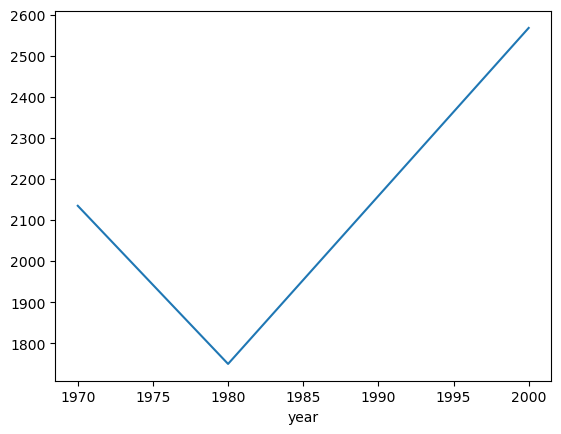

In [163]:
filt_title = titles[(titles['year'] == 1970) | (titles['year'] == 1980) | (titles['year'] == 2000)]
grouped = filt_title.groupby('year').count()
grouped.title.plot();


There was a large drop in movies released from 1970 to 1980, and then a huge jump from 1980 to 2000. This could have been due to a drop in consumer interest, or shifts in media outputs (ex. shifting from films to TV shows).

### 6. How big was the cast of Metropolis


In [29]:
cast[cast['title'] == 'Metropolis'][['name','character']].sort_values('name')

,name,character
3416,Alfred Abel,Joh Fredersen
2759815,Anny Hintze,Woman of Eternal Gardens
1736598,Arthur Reinhardt,Working Man
2672124,Beatrice Garga,Woman of Eternal Gardens
2748717,Brigitte Helm,Maria
2748716,Brigitte Helm,The Machine Man
1935963,Curt Siodmak,Working Man
2709135,Dolly Grey,Working Woman
2658590,Ellen Frey,Working Woman
193089,Erwin Biswanger,11811 - Georgy


In [30]:
members = cast_copy[cast_copy['title'] == 'Metropolis']['name'].nunique()
print(f'There were {members} cast members in Metropolis')

There were 31 cast members in Metropolis


### 7. How many roles for actors were there 1950's? 1990's

In [166]:
cast_copy['decade'] = cast_copy['year'] // 10 * 10
actors_50 = cast_copy[(cast_copy['type'] == 'actor') & (cast_copy['decade'] == 1950)]['character'].count()
print(f'There were {actors_50} actors in the 1950s')

There were 153559 actors in the 1950s


In [168]:
actors_90 = cast_copy[(cast_copy['type'] == 'actor') & (cast_copy['decade'] == 1990)]['character'].count()
print(f'There were {actors_90} actors in the 1990s')

There were 245713 actors in the 1990s


### 8. How many roles for actors & actresses over time? Output should be a line graph

<Axes: xlabel='year'>

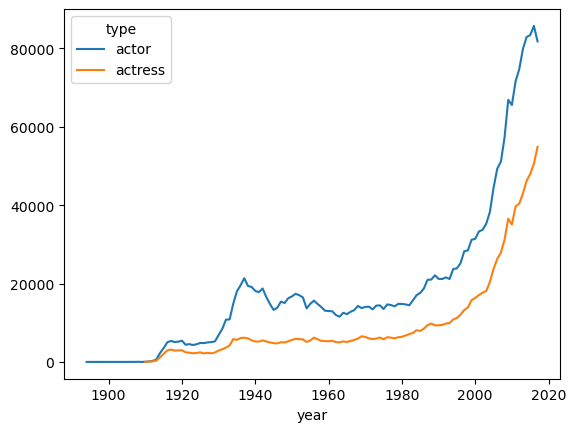

In [35]:
cast_copy[['year', 'type']].value_counts().sort_index().unstack().plot()

### 9. How many "leading roles" were there in the 2000's?

In [170]:
lead_roles = cast_copy[(cast_copy['decade'] == 2000) & (cast_copy['n'] == 1)]['title'].count()
print(f'There were {lead_roles} leading roles in the 2000s')

There were 23593 leading roles in the 2000s


### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [39]:
no_rank_2000 = cast_copy[(cast_copy['decade'] == 2000)]['n'].isna().sum()
no_rank_1950 = cast_copy[(cast_copy['decade'] == 1950)]['n'].isna().sum()
pct_no_rank_2000 = (no_rank_2000 / (cast_copy[(cast_copy['decade'] == 2000)]['n'].count())) * 100
pct_no_rank_1950 = (no_rank_1950 / (cast_copy[(cast_copy['decade'] == 1950)]['n'].count())) * 100

print(f' There were a total of {no_rank_2000} roles not ranked in the 2000s, which comprised {pct_no_rank_2000:0.1f}% of all roles')
print(f' There were a total of {no_rank_1950} roles not ranked in the 1950s, which comprised {pct_no_rank_1950:0.1f}% of all roles')

 There were a total of 232037 roles not ranked in the 2000s, which comprised 52.3% of all roles
 There were a total of 95406 roles not ranked in the 1950s, which comprised 83.3% of all roles


### 11. Plot the number of films made in each decade

<Axes: xlabel='decade'>

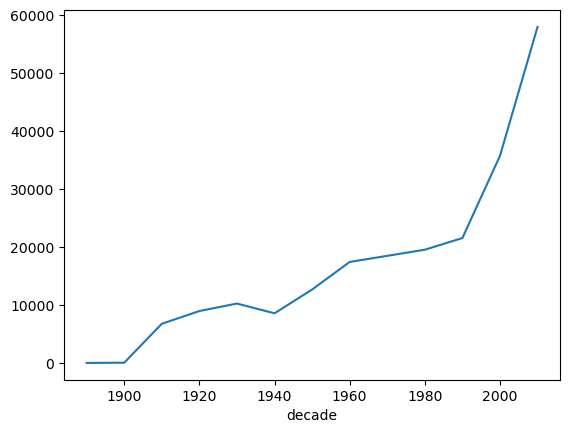

In [41]:
titles_copy = titles[titles.year < 2018].copy()
titles_copy['decade'].value_counts().sort_index().plot()

### 12. Plot the number of films with a Rustler character over time

<Axes: xlabel='year'>

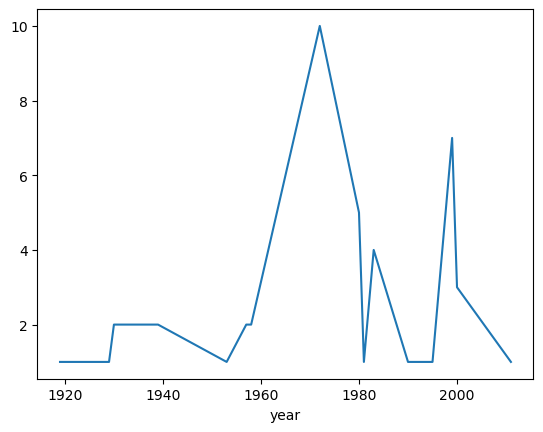

In [43]:
temp_df = cast_copy.copy()
temp_df = temp_df.dropna()
temp_df = temp_df[temp_df['character'].str.contains('Rustler', case=False)]
temp_df['year'].value_counts().sort_index().plot()



### 13. What are the top ten character names of all time?

In [45]:
print(cast_copy['character'].value_counts().head(10))

character
Himself        19418
Dancer         11937
Extra          10715
Reporter        7739
Doctor          6917
Party Guest     6744
Student         6486
Policeman       6409
Bartender       6228
Minor Role      6203
Name: count, dtype: int64


### 14. Which actor appeared in the most films in the 1990's decade?

In [174]:
cast_copy[cast_copy['decade'] == 1990]['name'].value_counts().head(1)

name
Shakti Kapoor    143
Name: count, dtype: int64

### 15. What are the top 10 roles that start with Science?

In [208]:
science_roles = cast_copy[cast_copy['character'].str.startswith('Science', na=False)]['character'].value_counts()
science_roles.iloc[:10]

character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Kid              5
Science Fair Kid         5
Science Fair Judge       5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: count, dtype: int64

### 16. What film has the largest cast

In [51]:
grouped = cast_copy.groupby('title').agg('count').sort_values(by='name',ascending=False)
largest_cast = grouped.index[0]
cast_count = grouped['name'].max()
print(f'{largest_cast} has the largest cast with {cast_count} cast members')

Around the World in 80 Days has the largest cast with 1364 cast members


### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [53]:
cast_count = cast_copy['title'].value_counts()
cast_count.describe()

count    164653.000000
mean         20.635591
std          24.174382
min           1.000000
25%           6.000000
50%          13.000000
75%          26.000000
max        1364.000000
Name: count, dtype: float64

For the films included in the "Cast" dataset, the movie with the largest cast had 1364 members, while the smallest cast only included 1 member. Films in the dataset have an average of 21 cast members and a median of 13. Films have a standard deviation of ~24 cast members, meaning that 67% of films had between 1 and 45 members. 

### 18. How many films has Natalie Portman been in in each year throughout her career?

In [55]:
cast_copy[cast_copy['name'] == 'Natalie Portman']['year'].value_counts().sort_index()

year
1995    1
1996    3
1999    3
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    2
2007    3
2008    1
2009    2
2010    4
2011    3
2013    1
2015    4
2016    3
2017    1
Name: count, dtype: int64

### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [57]:
cast_copy[(cast_copy['name'] == 'Natalie Portman') & (cast_copy['n'] <= 2)]['year'].value_counts().sort_index()

year
1999    1
2000    1
2002    1
2005    3
2006    2
2007    1
2008    1
2009    1
2010    2
2011    2
2013    1
2015    2
2016    2
Name: count, dtype: int64

### 20. Determine how many roles for actor or actress by decade. Plot the output 

<Axes: xlabel='decade'>

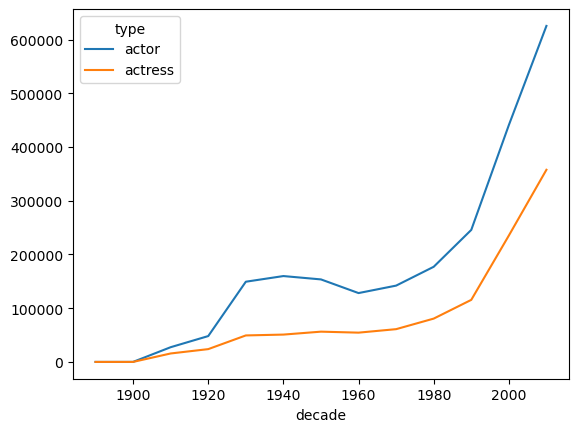

In [59]:
cast_copy[['decade', 'type']].value_counts().sort_index().unstack().plot()

### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [61]:
from datetime import datetime as dt
date_copy = r_dates.copy()
date_copy['date'] = pd.to_datetime(date_copy['date'])
date_copy['Day'] = date_copy['date'].dt.day_name()
date_copy['Month'] = date_copy['date'].dt.month_name()

In [114]:
pivot1 = date_copy.pivot_table(index='Day', values='title', aggfunc='count').sort_values(by='title', ascending=False)
pivot2 = date_copy.pivot_table(index='Month', values='title', aggfunc='count').sort_values(by='title', ascending=False)

print(pivot1)
print(pivot2)

            title
Day              
Friday     163174
Thursday   125746
Wednesday   53439
Monday      37210
Saturday    31331
Tuesday     16762
Sunday      15823
           title
Month           
March      40257
October    40204
January    39412
December   39096
November   38200
September  37750
April      37674
February   36307
May        35449
August     35011
June       32704
July       31421


Movies are predominantly released on Thursdays and Fridays, with the fewest movies released on Sundays and Tuesdays. It makes since that movies are most often release on Fridays, since Friday night is the transition into the weekend when people are likely free and willing to have a later night out. 

There is not as significant of difference in spread between release month, and the top four months see similar numbers of move releases. It makes sense that the summer months of June - August have the fewest releases, since people are taking vacation and more likely to have plans that would interfere with going to the movies. 

### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

<BarContainer object of 7 artists>

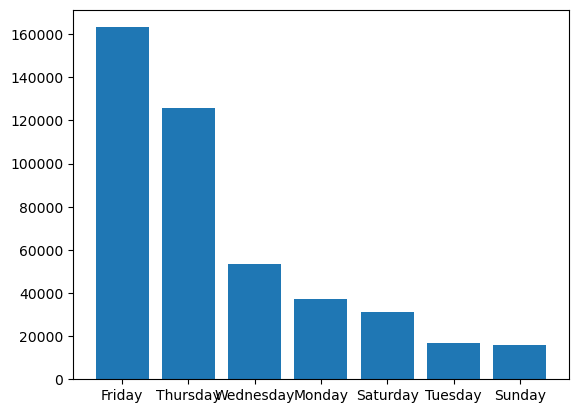

In [124]:
fig, ax = plt.subplots()
ax.bar(pivot1.index, pivot1['title'])

### 23. What films did actors in Star Wars go on to appear in? 

In [142]:
sw_cast = cast_copy[cast_copy['title'].str.contains('Star Wars', case=False, na=False)]['name'].unique()
sw_cast = sw_cast.tolist()

In [150]:
sw_cast_titles = cast_copy[cast_copy['name'].isin(sw_cast)]
sw_cast_titles[['name', 'title']]

,name,title
3900,Ian Abercrombie,Addams Family Values
3901,Ian Abercrombie,Blasphemy the Movie
3902,Ian Abercrombie,Chromiumblue.com
3903,Ian Abercrombie,Clean Slate
3904,Ian Abercrombie,Firewalker
...,...,...
3419580,Kristy Wright,Enemies Closer
3419581,Kristy Wright,Star Wars: Episode III - Revenge of the Sith
3419582,Kristy Wright,Stranded Pearl
3419583,Kristy Wright,The Crop
